In [1]:
import scanpy as sc
import numpy as np
import pandas as pd
import anndata as ad
import matplotlib.pyplot as plt



In [2]:
S = pd.read_csv('~/Downloads/E-MTAB-2805/S_singlecells_counts.txt', delimiter='\t')
G1 = pd.read_csv('~/Downloads/E-MTAB-2805/G1_singlecells_counts.txt', delimiter='\t')
G2M = pd.read_csv('~/Downloads/E-MTAB-2805/G2M_singlecells_counts.txt', delimiter='\t')
# First, merge df1 and df2 on 'EnsemblGeneID'
merged_df = pd.merge(S, G1.drop(columns = ['EnsemblTranscriptID', 'AssociatedGeneName',  'GeneLength']), on='EnsemblGeneID', how='inner')

# Then, merge the result with df3 on 'EnsemblGeneID'
df = pd.merge(merged_df, G2M.drop(columns = ['EnsemblTranscriptID', 'AssociatedGeneName',  'GeneLength']), on='EnsemblGeneID', how='inner')

# Display the first few rows of the dataframe
print(df.head())
df2 = df.iloc[:, 4:]


        EnsemblGeneID EnsemblTranscriptID AssociatedGeneName  GeneLength  \
0  ENSMUSG00000000001  ENSMUST00000000001              Gnai3      3262.0   
1  ENSMUSG00000000003  ENSMUST00000000003               Pbsn       902.0   
2  ENSMUSG00000000028  ENSMUST00000000028              Cdc45      2143.0   
3  ENSMUSG00000000031  ENSMUST00000136359                H19      2286.0   
4  ENSMUSG00000000037  ENSMUST00000112345              Scml2      4847.0   

   S_cell1_count  S_cell2_count  S_cell3_count  S_cell4_count  S_cell5_count  \
0              0            379            272           1364              0   
1              0              0              0              0              0   
2              0            324             14            431              0   
3              0              0              0              0              0   
4              0              0             59             19              0   

   S_cell6_count  ...  G2M_cell87_count  G2M_cell88_count  G2M

In [3]:
import re
pattern = r"^(.*?)_cell.*"
prefixes = [re.match(pattern, col).group(1) if re.match(pattern, col) else 'NA'
            for col in df2.columns]
obs_data = {'Phase': prefixes }
adata = ad.AnnData(X=df2.values.T, obs=pd.DataFrame(obs_data, index=df2.columns), var=pd.DataFrame( index=df['EnsemblGeneID']))
# Calculate the total counts for each sample (row) and add it to the obs attribute
adata.obs['total_counts'] = df2.sum(axis=1)


In [4]:
# Saving count data
adata.layers["counts"] = adata.X.copy()
# Normalizing to median total counts
sc.pp.normalize_total(adata)
# Logarithmize the data
sc.pp.log1p(adata)

adata.X

array([[ 0.       ,  0.       ,  0.       , ..., 13.175536 , 13.433365 ,
        15.385747 ],
       [ 6.1505156,  0.       ,  5.994085 , ..., 13.407673 , 11.804094 ,
        15.462036 ],
       [ 5.21576  ,  0.       ,  2.3443918, ..., 13.163479 , 11.58687  ,
        15.494469 ],
       ...,
       [ 1.0092263,  0.       ,  5.8520646, ..., 13.485877 , 10.97236  ,
        15.416442 ],
       [ 1.6028029,  0.       ,  1.8388412, ..., 13.167878 , 11.070179 ,
        15.40984  ],
       [ 0.       ,  0.       ,  0.       , ..., 13.4470215, 11.386277 ,
        15.348398 ]], dtype=float32)

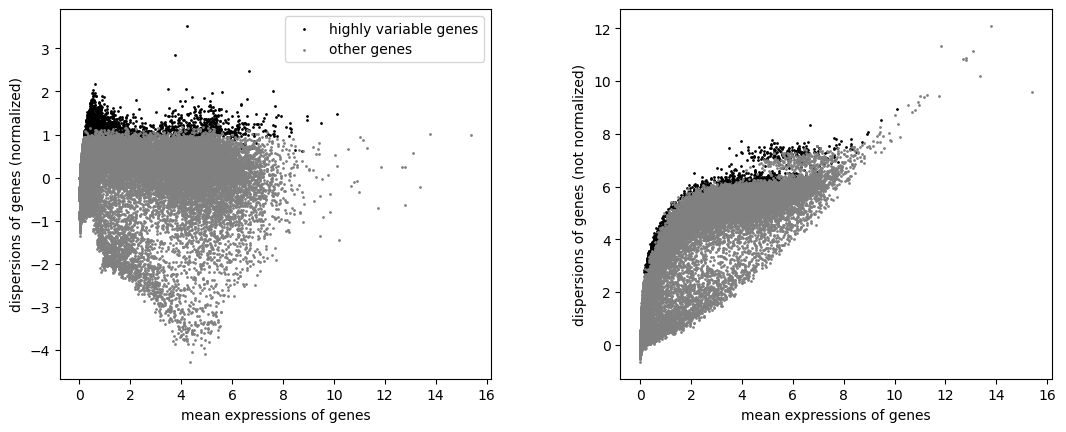

In [5]:
sc.pp.highly_variable_genes(adata, n_top_genes=2000, batch_key="Phase")
sc.pl.highly_variable_genes(adata)


In [6]:
from openpyxl import load_workbook

# Load the Excel file
wb = load_workbook(filename='/Users/henryhollis/Downloads/41587_2015_BFnbt3102_MOESM13_ESM.xlsx')

# Assuming the data is in the first sheet (index 0)
ws = wb.worksheets[4]

# Read the data from the Excel sheet into a list
cc_genes = []
for row in ws.iter_rows(values_only=True):
    cc_genes.append(list(row)[0])

# Display the data
print(cc_genes)

['ENSMUSG00000030867', 'ENSMUSG00000072082', 'ENSMUSG00000004864', 'ENSMUSG00000027496', 'ENSMUSG00000028873', 'ENSMUSG00000045328', 'ENSMUSG00000001403', 'ENSMUSG00000027469', 'ENSMUSG00000018362', 'ENSMUSG00000066878', 'ENSMUSG00000069083', 'ENSMUSG00000032254', 'ENSMUSG00000027379', 'ENSMUSG00000030654', 'ENSMUSG00000019942', 'ENSMUSG00000027715', 'ENSMUSG00000060860', 'ENSMUSG00000026683', 'ENSMUSG00000006398', 'ENSMUSG00000039130', 'ENSMUSG00000027306', 'ENSMUSG00000039883', 'ENSMUSG00000012443', 'ENSMUSG00000020808', 'ENSMUSG00000035177', 'ENSMUSG00000040084', 'ENSMUSG00000037313', 'ENSMUSG00000041064', 'ENSMUSG00000020415', 'ENSMUSG00000017716', 'ENSMUSG00000024795', 'ENSMUSG00000017499', 'ENSMUSG00000037628', 'ENSMUSG00000021697', 'ENSMUSG00000027342', 'ENSMUSG00000034906', 'ENSMUSG00000028461', 'ENSMUSG00000026955', 'ENSMUSG00000044934', 'ENSMUSG00000037725', 'ENSMUSG00000022034', 'ENSMUSG00000020649', 'ENSMUSG00000003778', 'ENSMUSG00000046179', 'ENSMUSG00000035293', 'ENSMUSG0

/opt/miniconda3/envs/native/lib/python3.12/site-packages/openpyxl/reader/excel.py:228: UserWarning: Unknown extension is not supported and will be removed
  ws_parser.bind_all()


In [7]:
# Filter the genes in adata to keep only those found in excel_genes
filtered_adata = adata[:, adata.var_names.isin(cc_genes)]

# Print the filtered AnnData object
print(filtered_adata)

View of AnnData object with n_obs × n_vars = 288 × 417
    obs: 'Phase', 'total_counts'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'log1p', 'hvg'
    layers: 'counts'


In [12]:
import seaborn as sns
import plotly.express as px

correlation_matrix = np.corrcoef(filtered_adata.X.T, rowvar=False)
# Create a clustered heatmap using Seaborn
# sns.clustermap(correlation_matrix, cmap='viridis', figsize=(8, 6))
# plt.show()

# Create a clustered heatmap using Plotly
fig = px.imshow(correlation_matrix, text_auto=True)
fig.show()